In [74]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.dates import DateFormatter, MinuteLocator

# read CSV file, parse 'date' column into DateTime, set 'date' as the df index
#df = pd.read_csv("data/coronavirus/ecdc_2020-03-27.csv", parse_dates=['dateRep'], index_col="dateRep")

today = dt.datetime.today()
filedate = today.strftime("%Y-%m-%d")
# Create URL to Excel file (alternatively this can be a filepath)
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-' + filedate + '.xlsx'

# Load the first sheet of the Excel file into a data frame
df = pd.read_excel(url, sheet_name=0, header=0)
df.drop(columns=['day','month','year','geoId','countryterritoryCode','popData2018'], inplace=True)
df.columns = ['date', 'new_cases', 'new_deaths', 'location']

# set yesterday's date for graphic
d = dt.datetime.today() - dt.timedelta(days=1)
#print ('Yesterdays and time: ', d)
# Converting date into Mon DD, YYYY format
#print(d.strftime('%b %d, %Y'))
#note that in the head result the date column label is listed lower than the other column labels, indicating it is the index value
df.head(5)

,date,new_cases,new_deaths,location
0,2020-03-28,16,1,Afghanistan
1,2020-03-27,0,0,Afghanistan
2,2020-03-26,33,0,Afghanistan
3,2020-03-25,2,0,Afghanistan
4,2020-03-24,6,1,Afghanistan


In [75]:
#sort dataframe by Country then by Date
df.sort_values(by=['location','date'],ascending=True,inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)
df.head(5)

,date,new_cases,new_deaths,location
0,2019-12-31,0,0,Afghanistan
1,2020-01-01,0,0,Afghanistan
2,2020-01-02,0,0,Afghanistan
3,2020-01-03,0,0,Afghanistan
4,2020-01-04,0,0,Afghanistan


In [76]:
#df.columns
#dfl = df.groupby('location')
#Days since 100th case
locations = df.location.unique()
loctot = locations.size
#print('Total locations: ' + str(locations.count()), 'Locations: ' + locations)
# curloc = locations[0] #'Afghanistan'
locnum = 0
for locs in locations:
    locnum += 1
    #loop through each row in df
    if curloc != locs:
        print('Processing: ' + locs + ', Number ' + str(locnum) + ' of ' + str(loctot))
        # add code for printing current country of total countries
    tcases = 0
    tdeaths = 0
    for index, row in df.iterrows():
        if row['location'] == locs:
            #if marker == 0:
                tcases = row['new_cases'] + tcases
                tdeaths = row['new_deaths'] + tdeaths
                df.loc[index,'total_cases'] = tcases
                df.loc[index,'total_deaths'] = tdeaths
                #print("Location: " + row['location'] + " New Cases: " + str(row['new_cases']) + " New Deaths: " + str(row['new_deaths']) + " Total Cases: " + str(tcases) + " Total Deaths: " + str(tdeaths))
                curloc = locs
# df.head(100)

Processing: Afghanistan, Number 1 of 196
Processing: Albania, Number 2 of 196
Processing: Algeria, Number 3 of 196
Processing: Andorra, Number 4 of 196
Processing: Angola, Number 5 of 196
Processing: Anguilla, Number 6 of 196
Processing: Antigua_and_Barbuda, Number 7 of 196
Processing: Argentina, Number 8 of 196
Processing: Armenia, Number 9 of 196
Processing: Aruba, Number 10 of 196
Processing: Australia, Number 11 of 196
Processing: Austria, Number 12 of 196
Processing: Azerbaijan, Number 13 of 196
Processing: Bahamas, Number 14 of 196
Processing: Bahrain, Number 15 of 196
Processing: Bangladesh, Number 16 of 196
Processing: Barbados, Number 17 of 196
Processing: Belarus, Number 18 of 196
Processing: Belgium, Number 19 of 196
Processing: Belize, Number 20 of 196
Processing: Benin, Number 21 of 196
Processing: Bermuda, Number 22 of 196
Processing: Bhutan, Number 23 of 196
Processing: Bolivia, Number 24 of 196
Processing: Bosnia_and_Herzegovina, Number 25 of 196
Processing: Brazil, Num

In [77]:
#Days since 100th case
locations = df.location.unique()
loctot = locations.size
locnum = 0
for locs in locations:
    locnum += 1
    #loop through each row in df
    if curloc != locs:
        print('Processing: ' + locs + ', Number ' + str(locnum) + ' of ' + str(loctot))
        # add code for printing current country of total countries
    marker = 0
    for index, row in df.iterrows():
        if row['location'] == locs:
            if row['total_cases'] < 100:
                #if locs == "United States":
                    #print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']))
                df.loc[index,'d100th_case'] = 0
            elif row['total_cases'] >= 100:
                if marker == 0:
                    marker = 1
                    df.loc[index,'d100th_case'] = 0
                    d100 = row['date']
                    #if locs == "United States":
                        #print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']) + ", Start Date = " + str(d100))
                else:
                    timedelta = row['date'] - d100
                    timedeltaint = timedelta.days
                    df.loc[index,'d100th_case'] = timedeltaint
                    #if locs == "United States":
                        #print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']) + ", Start Date = " + str(d100) + ", D100 = " + str(timedeltaint))
            else:
               print("something went wrong")
               break
#df100.head()

Processing: Afghanistan, Number 1 of 196
Processing: Albania, Number 2 of 196
Processing: Algeria, Number 3 of 196
Processing: Andorra, Number 4 of 196
Processing: Angola, Number 5 of 196
Processing: Anguilla, Number 6 of 196
Processing: Antigua_and_Barbuda, Number 7 of 196
Processing: Argentina, Number 8 of 196
Processing: Armenia, Number 9 of 196
Processing: Aruba, Number 10 of 196
Processing: Australia, Number 11 of 196
Processing: Austria, Number 12 of 196
Processing: Azerbaijan, Number 13 of 196
Processing: Bahamas, Number 14 of 196
Processing: Bahrain, Number 15 of 196
Processing: Bangladesh, Number 16 of 196
Processing: Barbados, Number 17 of 196
Processing: Belarus, Number 18 of 196
Processing: Belgium, Number 19 of 196
Processing: Belize, Number 20 of 196
Processing: Benin, Number 21 of 196
Processing: Bermuda, Number 22 of 196
Processing: Bhutan, Number 23 of 196
Processing: Bolivia, Number 24 of 196
Processing: Bosnia_and_Herzegovina, Number 25 of 196
Processing: Brazil, Num

In [79]:
df.tail(10)

,date,new_cases,new_deaths,location,total_cases,total_deaths,d100th_case
7310,2020-03-27,2,0,Zambia,14.0,0.0,0.0
7311,2020-03-28,2,0,Zambia,16.0,0.0,0.0
7312,2020-03-21,1,0,Zimbabwe,1.0,0.0,0.0
7313,2020-03-22,1,0,Zimbabwe,2.0,0.0,0.0
7314,2020-03-23,0,0,Zimbabwe,2.0,0.0,0.0
7315,2020-03-24,0,1,Zimbabwe,2.0,1.0,0.0
7316,2020-03-25,0,0,Zimbabwe,2.0,1.0,0.0
7317,2020-03-26,1,0,Zimbabwe,3.0,1.0,0.0
7318,2020-03-27,0,0,Zimbabwe,3.0,1.0,0.0
7319,2020-03-28,2,0,Zimbabwe,5.0,1.0,0.0


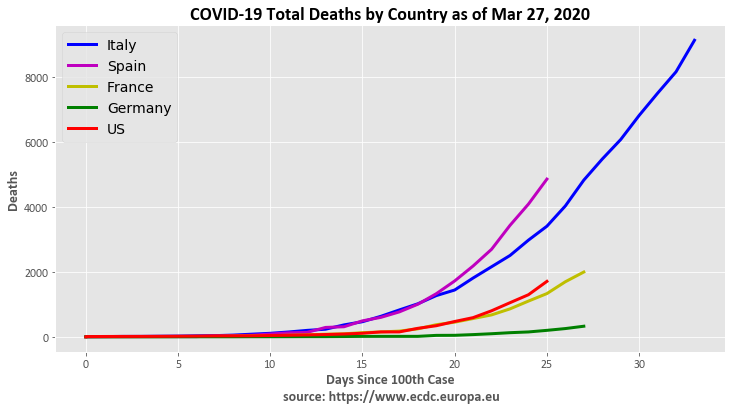

In [80]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
df100g = df.groupby('location')
#ax.plot(df100g.get_group('China')['d100th_case'], df100g.get_group('China')['total_deaths'], label='China', linewidth=3)
ax.plot(df100g.get_group('Italy')['d100th_case'], df100g.get_group('Italy')['total_deaths'], 'b', label='Italy', linewidth=3)
ax.plot(df100g.get_group('Spain')['d100th_case'], df100g.get_group('Spain')['total_deaths'], 'm', label='Spain', linewidth=3)
ax.plot(df100g.get_group('France')['d100th_case'], df100g.get_group('France')['total_deaths'], 'y', label='France', linewidth=3)
ax.plot(df100g.get_group('Germany')['d100th_case'], df100g.get_group('Germany')['total_deaths'], 'g',label='Germany', linewidth=3)
#ax.plot(df100g.get_group('South Korea')['d100th_case'], df100g.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=3)
ax.plot(df100g.get_group('United_States_of_America')['d100th_case'], df100g.get_group('United_States_of_America')['total_deaths'], 'r', label='US', linewidth=3)
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
#log sclae for y values
#plt.yscale("log")
ax.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Deaths by Country as of Mar 24, 2020', fontsize=20, fontweight="bold", fontname="Calibri")
plt.title('COVID-19 Total Deaths by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Days Since 100th Case\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.savefig('COVID-2020-03-27_100d_ecdc.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [140]:
# Population normalization, per 1,000
locations = df.location.unique()
loctot = locations.size
locnum = 0
ItalyPopT = 60484
SpainPopT = 46750
FrancePopT = 65236
GermanyPopT = 83715
USPopT = 330505

def calcs(say, person):
    """
    Calculates values for normalize population cases and deaths; calculates days since threshold value of population normalized cases and deaths
    Parameters:
        say (str) : What do you want to say?
        person (str) : Who do you want to say it to?
    Returns:
        Greeting, which is a string
    """
    return f"{say} {person}!"

for locs in locations:
    locnum += 1
    #loop through each row in df
    if curloc != locs:
        print('Processing: ' + locs + ', Number ' + str(locnum) + ' of ' + str(loctot))
        # add code for printing current country of total countries
    marker = 0
    for index, row in df.iterrows():
        if row['location'] == locs:
            if row['location'] == "Italy":
                cases_norm = row['total_cases'] / ItalyPopT
                deaths_norm = row['total_deaths'] / ItalyPopT
                df.loc[index,'cases_norm'] = cases_norm
                df.loc[index,'deaths_norm'] = deaths_norm
                if cases_norm < 0.05:
                    df.loc[index,'dnorm_case'] = 0
                elif row['total_cases'] >= 0.05:
                    if marker == 0:
                        marker = 1
                        df.loc[index,'dnorm_case'] = 0
                        d100 = row['date']
                    else:
                        timedelta = row['date'] - d100
                        timedeltaint = timedelta.days
                        df.loc[index,'dnorm_case'] = timedeltaint
            elif row['location'] == "Spain":
                cases_norm = row['total_cases'] / SpainPopT
                deaths_norm = row['total_deaths'] / SpainPopT
                df.loc[index,'cases_norm'] = cases_norm
                df.loc[index,'deaths_norm'] = deaths_norm
                if cases_norm < 0.05:
                    df.loc[index,'dnorm_case'] = 0
                elif row['total_cases'] >= 0.05:
                    if marker == 0:
                        marker = 1
                        df.loc[index,'dnorm_case'] = 0
                        d100 = row['date']
                    else:
                        timedelta = row['date'] - d100
                        timedeltaint = timedelta.days
                        df.loc[index,'dnorm_case'] = timedeltaint
            elif row['location'] == "France":
                cases_norm = row['total_cases'] / FrancePopT
                deaths_norm = row['total_deaths'] / FrancePopT
                df.loc[index,'cases_norm'] = cases_norm
                df.loc[index,'deaths_norm'] = deaths_norm
                if cases_norm < 0.05:
                    df.loc[index,'dnorm_case'] = 0
                elif row['total_cases'] >= 0.05:
                    if marker == 0:
                        marker = 1
                        df.loc[index,'dnorm_case'] = 0
                        d100 = row['date']
                    else:
                        timedelta = row['date'] - d100
                        timedeltaint = timedelta.days
                        df.loc[index,'dnorm_case'] = timedeltaint
            elif row['location'] == "Germany":
                cases_norm = row['total_cases'] / GermanyPopT
                deaths_norm = row['total_deaths'] / GermanyPopT
                df.loc[index,'cases_norm'] = cases_norm
                df.loc[index,'deaths_norm'] = deaths_norm
                if cases_norm < 0.05:
                    df.loc[index,'dnorm_case'] = 0
                elif row['total_cases'] >= 0.05:
                    if marker == 0:
                        marker = 1
                        df.loc[index,'dnorm_case'] = 0
                        d100 = row['date']
                    else:
                        timedelta = row['date'] - d100
                        timedeltaint = timedelta.days
                        df.loc[index,'dnorm_case'] = timedeltaint
            elif row['location'] == "United_States_of_America":
                cases_norm = row['total_cases'] / USPopT
                deaths_norm = row['total_deaths'] / USPopT
                df.loc[index,'cases_norm'] = cases_norm
                df.loc[index,'deaths_norm'] = deaths_norm
                if cases_norm < 0.05:
                    df.loc[index,'dnorm_case'] = 0
                elif row['total_cases'] >= 0.05:
                    if marker == 0:
                        marker = 1
                        df.loc[index,'dnorm_case'] = 0
                        d100 = row['date']
                    else:
                        timedelta = row['date'] - d100
                        timedeltaint = timedelta.days
                        df.loc[index,'dnorm_case'] = timedeltaint

#df100.head()

Processing: Afghanistan, Number 1 of 196
Processing: Albania, Number 2 of 196
Processing: Algeria, Number 3 of 196
Processing: Andorra, Number 4 of 196
Processing: Angola, Number 5 of 196
Processing: Anguilla, Number 6 of 196
Processing: Antigua_and_Barbuda, Number 7 of 196
Processing: Argentina, Number 8 of 196
Processing: Armenia, Number 9 of 196
Processing: Aruba, Number 10 of 196
Processing: Australia, Number 11 of 196
Processing: Austria, Number 12 of 196
Processing: Azerbaijan, Number 13 of 196
Processing: Bahamas, Number 14 of 196
Processing: Bahrain, Number 15 of 196
Processing: Bangladesh, Number 16 of 196
Processing: Barbados, Number 17 of 196
Processing: Belarus, Number 18 of 196
Processing: Belgium, Number 19 of 196
Processing: Belize, Number 20 of 196
Processing: Benin, Number 21 of 196
Processing: Bermuda, Number 22 of 196
Processing: Bhutan, Number 23 of 196
Processing: Bolivia, Number 24 of 196
Processing: Bosnia_and_Herzegovina, Number 25 of 196
Processing: Brazil, Num

In [95]:
df.head()

,date,new_cases,new_deaths,location,total_cases,total_deaths,d100th_case,cases_norm,deaths_norm
0,2019-12-31,0,0,Afghanistan,0.0,0.0,0.0,NaN,NaN
1,2020-01-01,0,0,Afghanistan,0.0,0.0,0.0,NaN,NaN
2,2020-01-02,0,0,Afghanistan,0.0,0.0,0.0,NaN,NaN
3,2020-01-03,0,0,Afghanistan,0.0,0.0,0.0,NaN,NaN
4,2020-01-04,0,0,Afghanistan,0.0,0.0,0.0,NaN,NaN


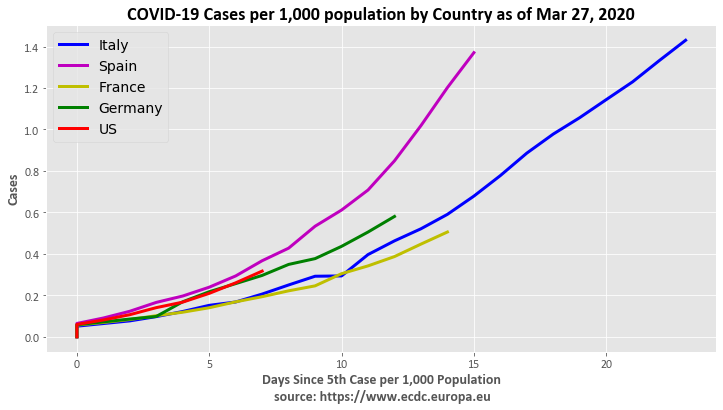

In [141]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
df100g = df.groupby('location')
ax.plot(df100g.get_group('Italy')['dnorm_case'], df100g.get_group('Italy')['cases_norm'], 'b', label='Italy', linewidth=3)
ax.plot(df100g.get_group('Spain')['dnorm_case'], df100g.get_group('Spain')['cases_norm'], 'm', label='Spain', linewidth=3)
ax.plot(df100g.get_group('France')['dnorm_case'], df100g.get_group('France')['cases_norm'], 'y', label='France', linewidth=3)
ax.plot(df100g.get_group('Germany')['dnorm_case'], df100g.get_group('Germany')['cases_norm'], 'g',label='Germany', linewidth=3)
ax.plot(df100g.get_group('United_States_of_America')['dnorm_case'], df100g.get_group('United_States_of_America')['cases_norm'], 'r', label='US', linewidth=3)
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
#log sclae for y values
#plt.yscale("log")
#ax.annotate('Change in testing?', xy=(18, 1), xytext=(8, 3),
#           arrowprops=dict(facecolor='black'),  bbox=dict(boxstyle="round", fc="none", ec="gray"))
#ax.annotate('Change in testing?', xy=(18, 1), xytext=(12, 2),
#             arrowprops=dict(arrowstyle="fancy",
#                            fc="0.2", ec="none",
#                            connectionstyle="angle3,angleA=45,angleB=330"))

# zip joins x and y coordinates in pairs
# for x,y in zip(df100g.get_group('United_States_of_America')['d100th_case'], df100g.get_group('United_States_of_America')['cases_norm']):
#     if y > 0.005:
#         label = "{:.2f}".format(y)
#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
# for x,y in zip(df100g.get_group('Italy')['d100th_case'], df100g.get_group('Italy')['cases_norm']):
#     if y > 0.005:
#         label = "{:.2f}".format(y)
#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
ax.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Deaths by Country as of Mar 24, 2020', fontsize=20, fontweight="bold", fontname="Calibri")
plt.title('COVID-19 Cases per 1,000 population by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Days Since 5th Case per 1,000 Population\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.savefig('COVID-2020-03-28_100d_casenorm_ecdc.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

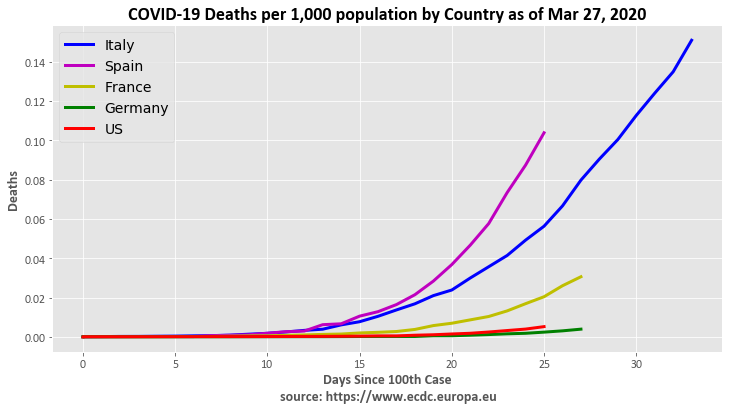

In [131]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
df100g = df.groupby('location')
ax.plot(df100g.get_group('Italy')['d100th_case'], df100g.get_group('Italy')['deaths_norm'], 'b', label='Italy', linewidth=3)
ax.plot(df100g.get_group('Spain')['d100th_case'], df100g.get_group('Spain')['deaths_norm'], 'm', label='Spain', linewidth=3)
ax.plot(df100g.get_group('France')['d100th_case'], df100g.get_group('France')['deaths_norm'], 'y', label='France', linewidth=3)
ax.plot(df100g.get_group('Germany')['d100th_case'], df100g.get_group('Germany')['deaths_norm'], 'g',label='Germany', linewidth=3)
ax.plot(df100g.get_group('United_States_of_America')['d100th_case'], df100g.get_group('United_States_of_America')['deaths_norm'], 'r', label='US', linewidth=3)
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
#log sclae for y values
#plt.yscale("log")
ax.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Deaths by Country as of Mar 24, 2020', fontsize=20, fontweight="bold", fontname="Calibri")
plt.title('COVID-19 Deaths per 1,000 population by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Days Since 100th Case\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.savefig('COVID-2020-03-28_100d_deathnorm_ecdc.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

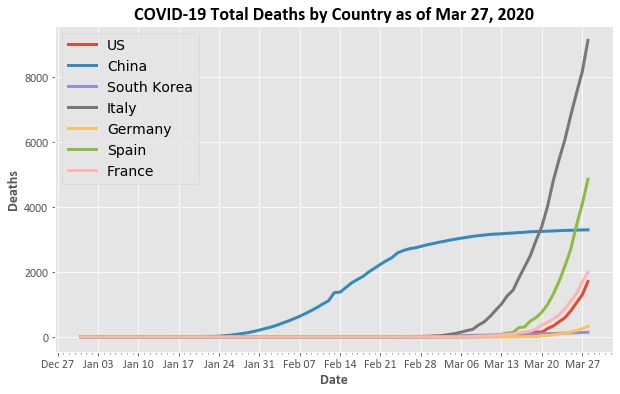

In [82]:
plt.style.use('ggplot')
dfd = df.set_index(['date'])
dfloc = dfd.groupby('location')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.plot(dfloc.get_group('United_States_of_America')['total_deaths'], label='US', linewidth=3)
plt.plot(dfloc.get_group('China')['total_deaths'], label='China', linewidth=3)
plt.plot(dfloc.get_group('South_Korea')['total_deaths'], label='South Korea', linewidth=3)
plt.plot(dfloc.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
plt.plot(dfloc.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
plt.plot(dfloc.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
plt.plot(dfloc.get_group('France')['total_deaths'], label='France', linewidth=3)
#plt.xticks(rotation='85')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
# Set the font name for axis tick labels to be Comic Sans
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
plt.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Deaths by Country as of Mar 23, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
plt.title('COVID-19 Total Deaths by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.show()
#plt.savefig('COVID-2020-03-24.png', bbox_inches='tight', pad_inches=0.2)

Text(0.5, 0, 'Date')

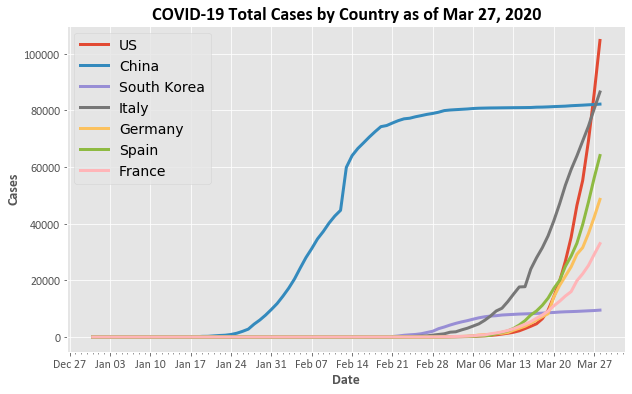

In [83]:
plt.style.use('ggplot')
#dfloc = df.groupby('location')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.style.use('ggplot')
plt.plot(dfloc.get_group('United_States_of_America')['total_cases'], label='US', linewidth=3)
plt.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
plt.plot(dfloc.get_group('South_Korea')['total_cases'], label='South Korea', linewidth=3)
plt.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
plt.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
plt.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
plt.plot(dfloc.get_group('France')['total_cases'], label='France', linewidth=3)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
plt.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
plt.title('COVID-19 Total Cases by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")

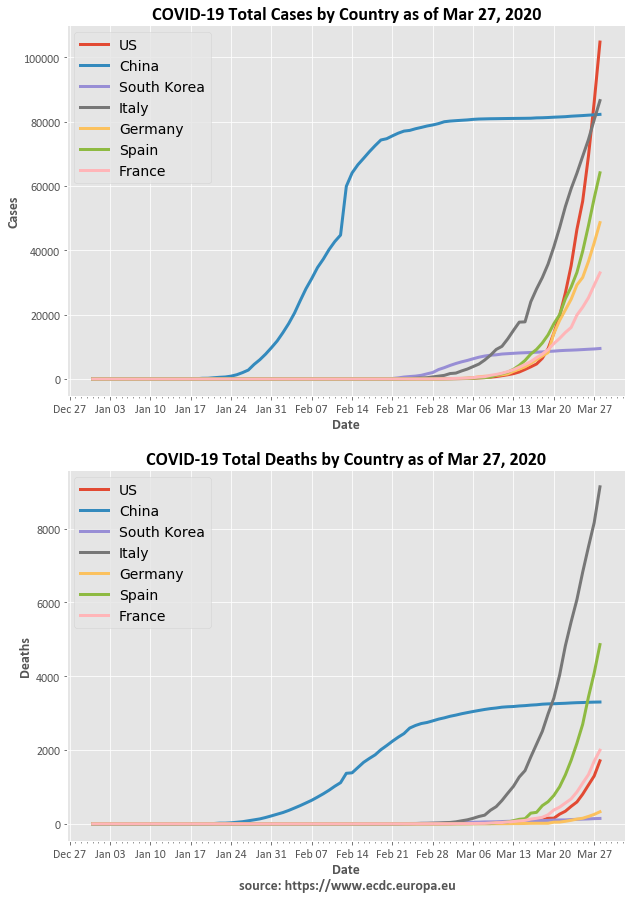

In [84]:
# Double figure for World Cases and World Deaths

plt.style.use('ggplot')
fig3, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United_States_of_America')['total_cases'], label='US', linewidth=3)
ax1.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
ax1.plot(dfloc.get_group('South_Korea')['total_cases'], label='South Korea', linewidth=3)
ax1.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
ax1.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
ax1.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
ax1.plot(dfloc.get_group('France')['total_cases'], label='France', linewidth=3)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax1.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax1.legend(loc='best', fontsize=14)
#ax1.set_title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_title('COVID-19 Total Cases by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax1.set_xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United_States_of_America')['total_deaths'], label='US', linewidth=3)
ax2.plot(dfloc.get_group('China')['total_deaths'], label='China', linewidth=3)
ax2.plot(dfloc.get_group('South_Korea')['total_deaths'], label='South Korea', linewidth=3)
ax2.plot(dfloc.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
ax2.plot(dfloc.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
ax2.plot(dfloc.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
ax2.plot(dfloc.get_group('France')['total_deaths'], label='France', linewidth=3)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax2.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax2.legend(loc='best', fontsize=14)
#ax2.set_title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
ax2.set_title('COVID-19 Total Deaths by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
#ax2.text(1, 1, 'source: https://ourworldindata.org/coronavirus-source-data')
#plt.figtext(5, 0.5, 10, text='test')
#plt.show()
plt.savefig('COVID-2020-03-28_US_ecdc.png', bbox_inches='tight', pad_inches=0.2)

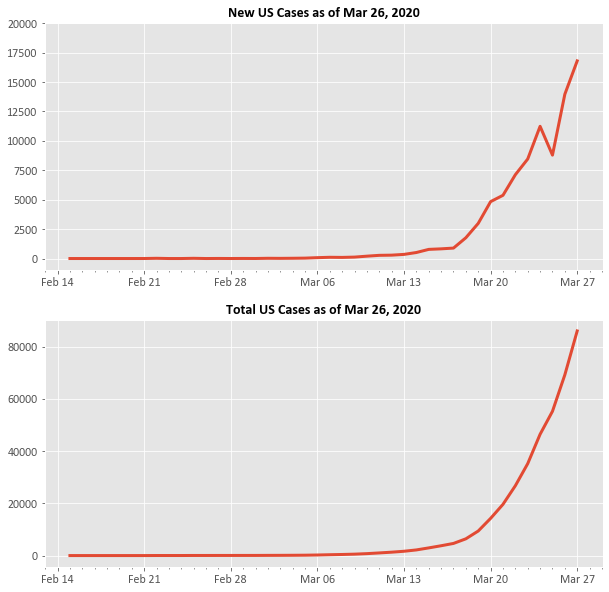

In [70]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

#plot 'new_cases' from United States from Feb 15 - Current Date 
ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United_States_of_America')["2020-02-15":].new_cases, linewidth=3)
ax1.set_ylim((-1000,20000))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax1.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax1.set_title('New US Cases as of ' + d.strftime('%b %d, %Y'), fontsize=14, fontweight="bold", fontname="Calibri")

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United_States_of_America')["2020-02-15":].total_cases, linewidth=3)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax2.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
#ax2.set_title('Total US Cases', fontsize=14, fontweight="bold", fontname="Calibri")
ax2.set_title('Total US Cases as of ' + d.strftime('%b %d, %Y'), fontsize=14, fontweight="bold", fontname="Calibri")

plt.show()

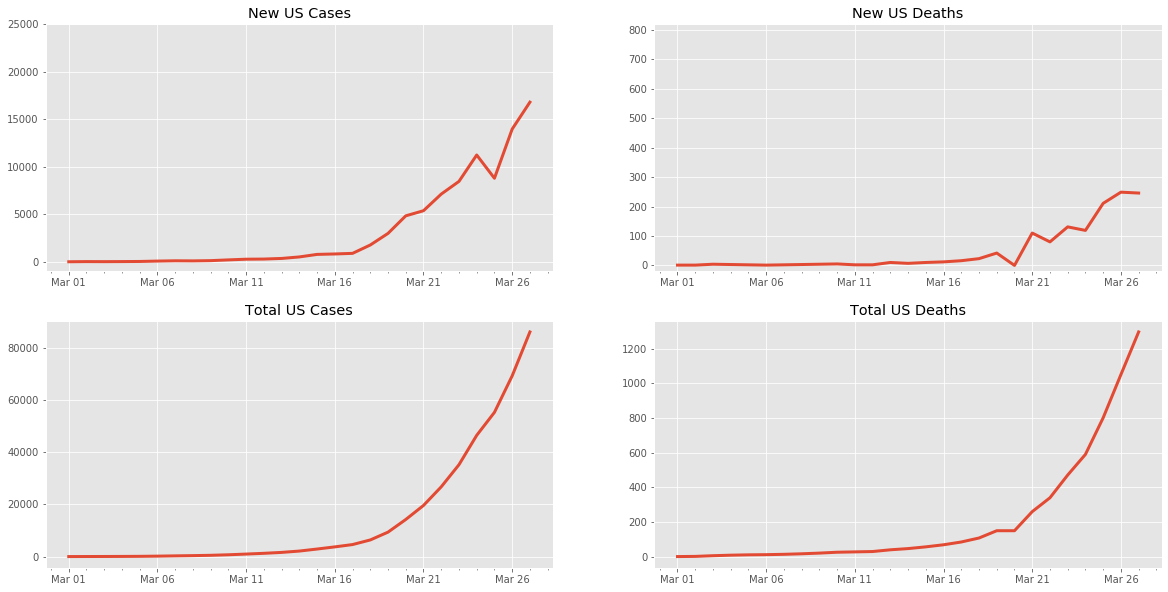

In [71]:
plt.style.use('ggplot')
#plt.xkcd()

#create a figure with two rows and two columns of graphs
fig, (axes) = plt.subplots(2, 2, figsize=(20,10))

#new graph in position 1 of 4 in 2x2 figure
ax1 = plt.subplot(221)
#plot 'new_cases' from location grouped dataframe
ax1.plot(dfloc.get_group('United_States_of_America')["2020-03-01":].new_cases, linewidth=3)
#set y-limit to match scale of total cases
ax1.set_ylim((-1000,25000))
#set ticks every week
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set major ticks at seven spots
#ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
# set minor ticks at days
ax1.xaxis.set_minor_locator(mdates.DayLocator())
ax1.set_title('New US Cases')

ax2 = plt.subplot(223)
ax2.plot(dfloc.get_group('United_States_of_America')["2020-03-01":].total_cases, linewidth=3)
#ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
ax2.set_title('Total US Cases')

ax3 = plt.subplot(222)
#ax3.plot(df_mar_us.new_deaths.resample('D').mean())
ax3.plot(dfloc.get_group('United_States_of_America')["2020-03-01":].new_deaths, linewidth=3)
ax3.set_ylim((-20,820))
#major ticks once a week
#ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
#major ticks every 4 days
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax3.xaxis.set_minor_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_title('New US Deaths')

ax4 = plt.subplot(224)
ax4.plot(dfloc.get_group('United_States_of_America')["2020-03-01":].total_deaths, linewidth=3)
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU, WE)))
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax4.xaxis.set_minor_locator(mdates.DayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_title('Total US Deaths')

plt.show()

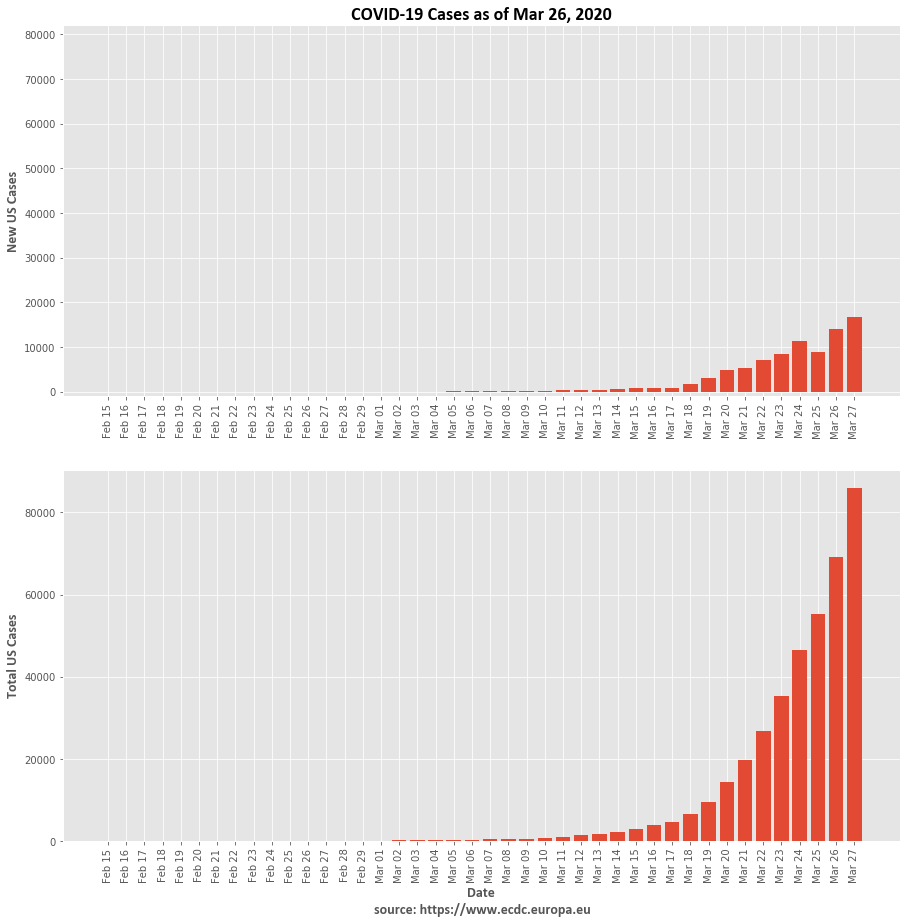

In [73]:
# define figure container (e.g. the canvas) size
fig = plt.figure(figsize=(15,15))

# add subplots to the figure
ax1 = fig.add_subplot(2,1,1) # 2 rows, 1 col, position 1)
ax2 = fig.add_subplot(2,1,2) # 2 rows, 1 col, position 2)

# x-axis is the date, Y axis is the number of cases
ax1.bar(dfloc.get_group('United_States_of_America')["2020-02-15":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-15":].new_cases)
ax1.set_xticklabels(dfloc.get_group('United_States_of_America')["2020-02-15":].index.strftime("%b %d"), rotation=90)

# x-axis is the date, Y axis is the number of cases
ax2.bar(dfloc.get_group('United_States_of_America')["2020-02-15":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-15":].total_cases)
ax2.set_xticklabels(dfloc.get_group('United_States_of_America')["2020-02-15":].index.strftime("%b %d"), rotation=90)

# #set y-limit to match scale of total cases
ax1.set_ylim((-1000,82000))

ax1.set_title('COVID-19 Cases as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")

plt.show()

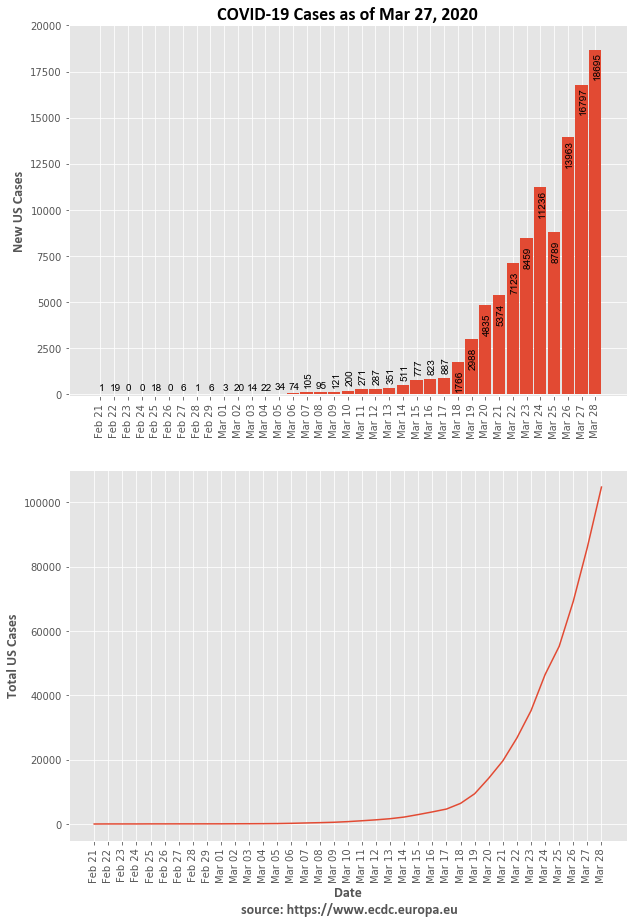

In [86]:
#fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

# function to label bars of bar chart
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height >= 100 and height < 1000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, 5),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        elif height >= 1000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, -30),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        else:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(1, 2),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial")

# x-axis is the date, Y axis is the number of cases
rects1=ax1.bar(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-21":].new_cases, width=0.9)
ax1.set_xticklabels(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), rotation=90)
autolabel(rects1)

# x-axis is the date, Y axis is the number of cases
ax2.plot(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-21":].total_cases)
ax2.set_xticklabels(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), rotation=90)

#set y-limit to match scale of total cases
ax1.set_ylim((-100,20000))

ax1.set_title('COVID-19 Cases as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.show()

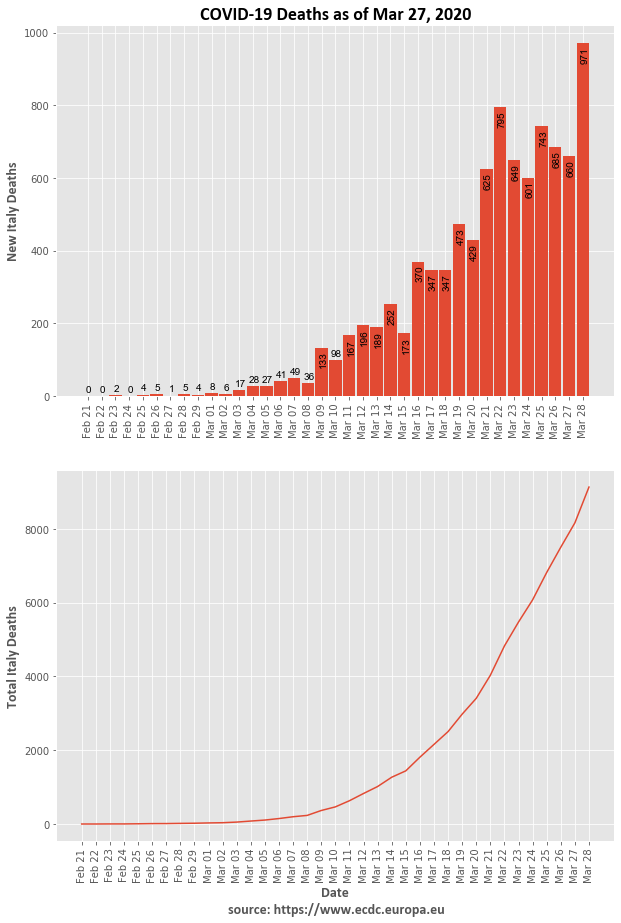

In [91]:
#fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

# function to label bars of bar chart
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height >= 100 and height < 1000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, -20),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        elif height >= 1000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, -30),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        else:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(1, 2),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial")

# x-axis is the date, Y axis is the number of cases
rects1=ax1.bar(dfloc.get_group('Italy')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('Italy')["2020-02-21":].new_deaths, width=0.9)
ax1.set_xticklabels(dfloc.get_group('Italy')["2020-02-21":].index.strftime("%b %d"), rotation=90)
autolabel(rects1)

# x-axis is the date, Y axis is the number of cases
ax2.plot(dfloc.get_group('Italy')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('Italy')["2020-02-21":].total_deaths)
ax2.set_xticklabels(dfloc.get_group('Italy')["2020-02-21":].index.strftime("%b %d"), rotation=90)

#set y-limit to match scale of total cases
#ax1.set_ylim((-100,20000))

ax1.set_title('COVID-19 Deaths as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New Italy Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total Italy Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.savefig('COVID-2020-03-28_Italy_ecdc.png', bbox_inches='tight', pad_inches=0.2)
plt.show()